<a href="https://colab.research.google.com/github/pmpatel-udallas/PChemLab/blob/main/AI%20Tutorials/RDKit%20Introduction%20with%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing RDkit

We will first install [conda](https://pypi.org/project/condacolab/) package manager then install all the packages that we need. In this case, RDKit. You can use this method to install other packages in colab

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:28
🔁 Restarting kernel...


After you see the kernel restarting (you will get a notification that the seesion has crashed from unknown reason), run the following cell. The expected output is "**Everything looks OK**!"

In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


Now the conda environment is set up, let us install the packages that we need - rdkit. We will use **conda install** to get **rdkit** package from conda-forge channel (**-c**).

In [2]:
!conda install -c conda-forge rdkit

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hd590300_1          19 KB  conda-forge
    brotli-bin-1.1.0           |       hd590300_1          19 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    chardet-5.2.0              |  py310hff52083_2         238 KB  conda-forge
    contou

## Importing required definitions

In [3]:
from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
import pandas as pd
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!jupyter nbextension enable --py widgetsnbextension
from tqdm.notebook import tqdm, tnrange, trange

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Representing molecules as strings is done with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule. (https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) For example n-butane is represented as CCCC. Interactive RDKit demo for SMILES is available at https://rdkit.org/temp/demo/demo.html

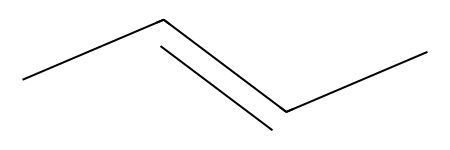

In [4]:
# creating a molecule object from SMILES of n-buane
mol = Chem.MolFromSmiles("CC=CC")
mol

The molecule object has atom objects which can be used for some operations

In [5]:
# Get the number of atoms and types of atoms

for idx, atom in enumerate(mol.GetAtoms()):
  print("Atom", idx + 1,"has atomic number of",atom.GetAtomicNum())

print()
# available methods for atoms
# dir(atom)

Atom 1 has atomic number of 6
Atom 2 has atomic number of 6
Atom 3 has atomic number of 6
Atom 4 has atomic number of 6



Similar to atoms, the bonds list can also be retrieved.

In [6]:
# Here we will get the tyrp of bond whether single,double
for idx,bond in enumerate(mol.GetBonds()):
  print("Bond",idx+1,"the type of bond is",bond.GetBondType().name)

print()
# available methods for bonds
# dir(bond)

Bond 1 the type of bond is SINGLE
Bond 2 the type of bond is DOUBLE
Bond 3 the type of bond is SINGLE



## **Try it yourself!**
Find the molecule that has -

 1) highest number of atoms

 2) highest number of rings

 2) highest number of double bonds

 3) largest number of non-carbon atoms (atoms not C or H)

 The list of smiles is given to you. There are 133885 smiles. You can consider is smaller set of smiles by slicing the list (e.g. smiles_list_500 = smiles_list[:500])

In [8]:
# DO NOT EDIT THE CODE IN THE CELL
# run this code before you work on the solution to the exercise
!git clone https://github.com/pmpatel-udallas/PChemLab.git

# read the file with smiles
with open(r'/content/PChemLab/AI Tutorials/H_smiles.dat') as file:
    smiles=file.read()

# clean the files to generate list of smiles
smiles_list = smiles.strip().split("\n")
print("The number of smiles in the list is",len(smiles_list))


fatal: destination path 'PChemLab' already exists and is not an empty directory.
The number of smiles in the list is 133885


In [ ]:
# YOUR CODE HERE
smiles_list[:10]

## Generating the 3D structure
The molecule generated from smiles has no hydrogen atoms nor the co-ordinates for the atoms (conformer). To generate 3D descriptors of a molecule for machine learning, we need a 3D structure/conformer. 2D descriptors may not need conformer.

In [ ]:
# Calculation of molecular weight with hydrogen atoms
CalcExactMolWt(mol)

In [ ]:
# Computing a 3D descriptor - radius of gyration
CalcRadiusOfGyration(mol)

In [ ]:
# checking whether the molecule object has a conformer
mol.GetNumConformers()

In [ ]:
# Let's add confomer and hydrogens to the molecule
mol_h = AddHs(mol)
print("Number of conformers is ", mol_h.GetNumConformers())
print(Chem.MolToMolBlock(mol_h))
mol_h

Always add hydrogen before conformer generation.

In [ ]:
# adding conformer
EmbedMolecule(mol_h)
print("Number of conformers is ", mol_h.GetNumConformers())
print(Chem.MolToMolBlock(mol_h))

Adding multiple conformers. You can use a forcefield to optimize the structure and compute energy.

In [ ]:
# Generating 50 conformers for the molecule
EmbedMultipleConfs(mol_h,numConfs=50)
print("Number of conformers is ", mol_h.GetNumConformers())

# **Try it yourself**

Plot the distribution of molecular volume (ComputeMolVolume) for the molecules in the smiles_list


In [ ]:
vols=[]
for smi in smiles_list[:500]:
    mol=Chem.MolFromSmiles(smi)
    mol_h=Chem.AddHs(mol)
    Chem.AllChem.EmbedMolecule(mol_h)
    vols.append(Chem.AllChem.ComputeMolVolume(mol_h))

import seaborn as sns
sns.distplot(vols)

## Dataframe
Creating a pandas dataframe for storing data is possible with PandasTools.

In [ ]:
# First create a pandas dataframe with SMILES as a column. sample(500) gets
# 500 entries from the larger set of 133885 molecules
df = pd.DataFrame(smiles_list, columns=["smiles"]).sample(500)
df.head() # to look the the first 5 entries

In [ ]:
# using pandastools to create molecule from smiles within the dataframe
PandasTools.AddMoleculeColumnToFrame(df,smilesCol="smiles")
df.head()

Now that we have the molecule objects, we can generate the input and the target values for machine learning. We will use the number of rings as the target value and molecular fingerprint as the input. You can find more details on molecular fingerprints [here](https://docs.chemaxon.com/display/docs/chemical-fingerprints.md)



In [ ]:
# generating the target values - molecular weights.
# we use the CalcExactMolWt function from rdkit
df["target"] = df["ROMol"].apply(CalcNumRings)
df.head()

## Generate the Morgan fingerprints


In [ ]:
# we define a function to generate a vector from a molecule object

def get_input(mol):
    morgan_generator = AllChem.GetMorganGenerator(radius=2,fpSsize=100)
    # radius: The radius of the circular neighborhood around each atom to consider (default: 2)
    # fpSize: The size of the Morgan Fingerprint
    fp = morgan_generator.GetFingerprint(mol) # gets the vector (corrected)
    arr = np.zeros((0,))
    DataStructs.ConvertToNumpyArray(fp, arr)  # converts the vector to numpy array
    return arr

df["input"] = df["ROMol"].apply(get_input) # adding the input column to the dataframe
df.head()

### Visualize the fingerprints

In [ ]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
fpgen = AllChem.GetMorganGenerator(radius=2)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetFingerprint(mol,additionalOutput=ao)
bi = ao.GetBitInfoMap()
bi[872]
((6, 2),)
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
fpgen = AllChem.GetRDKitFPGenerator()
ao = AllChem.AdditionalOutput()
ao.CollectBitPaths()
fp = fpgen.GetFingerprint(mol,additionalOutput=ao)
rdkbi = ao.GetBitPaths()
rdkbi[1553]
((0, 1, 9, 5, 4), (2, 3, 4, 9, 5))
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)

In [ ]:
smi = "CC1=CC=CC=C1"
mol = Chem.MolFromSmiles(smi)
bi = {}
fp = np.array(Chem.AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi, nBits=1024))

fpList=[31,33,64,175,356,389,698,726,799,849,896]
tpls1=[(mol, x, bi) for x in fpList]
Draw.DrawMorganBits(tpls1[:], molsPerRow=4, legends=[str(x) for x in fpList],useSVG=True)

# Machine learning models

In the previous cells we have the the input and target values for the machine learning model. Let us now get the data in the right format to train a model.

In [ ]:
# The input values must be in the for of a vector/list
# Here we assign the values from the dataframe to X and y
X = df["input"].values.tolist()
y = df["target"].values.tolist()
print("Input",X[0])
print("Target",y[0])

We always split the data into train and test set. The train set values are used for training while the test set is used to evalute the model. We will use a random forrest classifier as our model. You can find more details on random forrest [here](https://en.wikipedia.org/wiki/Random_forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

# This splits the dataset into 80% training, 20% test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) # split data for training and testing

# Using Random Forest Classifier
model = RandomForestClassifier(random_state=42) # initialize the model
model.fit(X_train, y_train) # train the model
y_predict = model.predict(X_test) # get prediction on the test set


#Using multilayer perceptron classifier (neural network)
clf = MLPClassifier(hidden_layer_sizes=(250,250,250),random_state=1, max_iter=300).fit(X_train, y_train)
y_MLP_predict = clf.predict(X_test)

For evaluation of the model we use confusion matrix. The x-axis is the true value and the y-axis is the predicted value

In [ ]:
confusion_mat = metrics.confusion_matrix(y_predict,y_test)
sns.heatmap(confusion_mat,annot=True,cmap="Blues",cbar=False)

## **Try it yourself**

1.   Use a random forest classifer for classification based on number of rings but try changing the fpSize value to check if the model improves. In the above example, the fingerprint size (fpSize) was 100.
2. Usual fingerprint sizes are 1024, 2048, and 4096.


**Just copy/paste code from above and make some tweaks**

In [ ]:
# YOUR CODE HERE

2. Using a random forest regressor for predicting the molecular mass. You can use metric.mean_squared_error for evaluating the model.

In [ ]:
df["MM"] = df["ROMol"].apply(CalcExactMolWt)
X = df["input"].values.tolist()
y = df["MM"].values.tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) # split data for training and testing

# Using Random Forest
model = RandomForestRegressor(random_state=42) # initialize the model
model.fit(X_train, y_train) # train the model
y_predict = model.predict(X_test) # get prediction on the test set

In [ ]:
metrics.mean_squared_error(y_predict,y_test)

In [ ]:
#Using multilayer perceptron classifier (neural network)
clf = MLPRegressor(hidden_layer_sizes=(250,250,250),random_state=1, max_iter=300).fit(X_train, y_train)
y_MLP_predict = clf.predict(X_test)